# Distinguishing Cited and Repackaged Instances, Topic Modeling, Mapping, & Link Parsing

## Distinguishing Cited and Repackaged Instances

In [1]:
import pandas as pd # used for creating/manipulating data frames

# read in data
foundlinks = pd.read_excel("foundlinks.modeling.xlsx")
foundlinks.head

c:\Users\Ksell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<bound method NDFrame.head of                                                    url  \
0    http://bonddad.blogspot.com/2021/12/manufactur...   
1    http://bonddad.blogspot.com/2023/09/initial-jo...   
2    http://bostongis.org/?content_name=umn_datasou...   
3    http://bostongis.org/?content_name=umn_datasou...   
4    http://colonialsense.com/society-lifestyle/cen...   
..                                                 ...   
767   https://www.medfieldpubliclibrary.org/databases/   
768  https://www.nature.com/articles/s41893-020-006...   
769  https://www.plannedparenthoodaction.org/florid...   
770  https://www.socialexplorer.com/data/acs2006/me...   
771        https://yelmwa.gov/news_detail_t10_r448.php   

                                           Found Links  \
0                      http://www.census.gov/econ/www/   
1                      http://www.census.gov/econ/www/   
2       http://www.census.gov/geo/www/tiger/index.html   
3     http://www.census.gov/geo/www/cob/b

In [2]:
# Perform cleaning again to the data just to be safe

#getting rid of special characters and lower caseing content
pattern = r'[^a-zA-Z0-9\s]'
foundlinks['content'] = foundlinks['content'].str.replace(pattern,'',regex=True)
# Remove new line characters
foundlinks['content'] = foundlinks['content'].str.replace(r'\n', '', regex=True)
foundlinks = foundlinks.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\Ksell\AppData\Local\Temp\ipykernel_12724\2461475174.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  foundlinks = foundlinks.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [5]:
#Sites had multiple found links, combining them to reduce duplicate URls and content
unique_links_per_url = foundlinks.groupby('url')['Found Links'].unique().reset_index()
unique_links_per_url # view data

,url,Found Links
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/]
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/]
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...
...,...,...
324,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...
325,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/]
326,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...
327,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en]


In [6]:
#key words for finding if site is repackaged or cited

keywords = ["tables","table","data","quickfacts"]

pattern = '|'.join(keywords)  

# Function to check if any link in the list contains a keyword
def contains_keyword(links, pattern):
    # Return True if any link contains a keyword, otherwise False
    return any(pd.notna(link) and pd.Series(link).str.contains(pattern, case=False, regex=True).any() 
               for link in links)

# Apply the function to create a new column 'contains_keywords'
unique_links_per_url['Source'] = unique_links_per_url['Found Links'].apply(lambda x: contains_keyword(x, pattern))
unique_links_per_url['Source'] = unique_links_per_url['Source'].replace({True: 'repackaged', False: 'cited'})

unique_links_per_url

,url,Found Links,Source
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/],cited
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/],cited
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...,cited
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...,cited
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...,cited
...,...,...,...
324,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...,cited
325,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/],repackaged
326,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...,repackaged
327,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en],cited


In [7]:
# combining content since we combined the links
combined_content = foundlinks.groupby('url')['content'].apply(' '.join).reset_index()
combined_content

,url,content
0,http://bonddad.blogspot.com/2021/12/manufactur...,the bonddad blog manufacturing still red hot c...
1,http://bonddad.blogspot.com/2023/09/initial-jo...,the bonddad blog initial jobless claims remain...
2,http://bostongis.org/?content_name=umn_datasou...,ogr odbcboston geographic information systemsh...
3,http://colonialsense.com/society-lifestyle/cen...,colonial sense societylifestyle census governa...
4,http://fileformats.archiveteam.org/index.php?t...,cps project just solve the file format proble...
...,...,...
324,https://www.withdra.com/p/mind-the-gap-explori...,vibecession exploring the growing divide betwe...
325,https://www.wxpr.org/2022-07-28/these-hurrican...,these hurricane flood maps reveal the climate ...
326,https://www.wyomingpublicmedia.org/news/2021-0...,single mothers bore brunt of coronavirus anxie...
327,https://yelmwa.gov/i_want_to/contact/send_a_no...,welcome to yelm washingtonskip to contentsearc...


In [8]:
# create and view final data
final_data = pd.merge(unique_links_per_url, combined_content, on='url')
final_data

,url,Found Links,Source,content
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/],cited,the bonddad blog manufacturing still red hot c...
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/],cited,the bonddad blog initial jobless claims remain...
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...,cited,ogr odbcboston geographic information systemsh...
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...,cited,colonial sense societylifestyle census governa...
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...,cited,cps project just solve the file format proble...
...,...,...,...,...
324,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...,cited,vibecession exploring the growing divide betwe...
325,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/],repackaged,these hurricane flood maps reveal the climate ...
326,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...,repackaged,single mothers bore brunt of coronavirus anxie...
327,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en],cited,welcome to yelm washingtonskip to contentsearc...


## Topic Modeling

### LDA

In [9]:
from sklearn.feature_extraction.text import CountVectorizer # turn corpus of text into document-term matrix
from gensim.corpora import Dictionary # create dictionary
from nltk.corpus import stopwords # removal of stopwords
from nltk.stem import WordNetLemmatizer # lemmatize text

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = stopwords.words('english') # standard English stopwords
stop_words.extend(["data", "census", "bureau"]) # words specific to this data set that add little meaning

# Preprocessing function to lemmatize text
def preprocess(text):
    tokens = text.split()  # tokenization
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]  
    return ' '.join(lemmatized)  # Return the lemmatized text

# Apply the preprocessing function to the content
final_data['content'] = final_data['content'].apply(preprocess)

# Vectorize the content with CountVectorizer
vec = CountVectorizer(stop_words=stop_words, max_df=0.8, min_df=0.2, token_pattern=r'\b[a-zA-Z]{3,}\b') 
X = vec.fit_transform(final_data['content']) # removes stopwords, words in more than 80% and less than 20% of records, numbers, and words with less than 3 characters

# Map terms to their ids for gensim compatibility
terms = vec.get_feature_names_out()

# Prepare the texts as tokenized lists (for coherence calculation)
tokenized_texts = [doc.split() for doc in final_data['content']]

# Create dictionary for coherence model
dictionary = Dictionary(tokenized_texts)

# Range of topic numbers to test
topics_range = range(3, 25)

In [10]:
import numpy as np # numpy functions
from sklearn.decomposition import LatentDirichletAllocation # LDA model
from gensim.models.coherencemodel import CoherenceModel # coherence scores
from sklearn.preprocessing import normalize # exclusivity calc

# Define a function to calculate coherence and exclusivity
def evaluate_topic_model(X, tokenized_texts, terms, num_topics, dictionary):
    # Initialize LDA
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=225)
    lda.fit(X)

    # Calculate Coherence
    topics = []
    for topic in lda.components_:
        top_word_ids = topic.argsort()[-20:][::-1]  # analyzes top 20 words
        topic_words = [terms[i] for i in top_word_ids]
        topics.append(topic_words)

    coherence_model = CoherenceModel(
        topics=topics,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='u_mass'
    )
    coherence_score = coherence_model.get_coherence()

    # Calculate Exclusivity
    topic_word_distributions = normalize(lda.components_, norm='l1', axis=1)
    exclusivity_scores = []
    for i, topic in enumerate(topic_word_distributions):
        top_word_ids = topic.argsort()[-20:][::-1]
        top_words = [terms[idx] for idx in top_word_ids]

        # Calculate exclusivity as uniqueness of each word in the topic
        exclusivity = 0
        for word in top_words:
            word_count = sum(word in other_topic for other_topic in topics)
            exclusivity += 1 / word_count  # Higher exclusivity if the word is rare across topics
        exclusivity_scores.append(exclusivity / len(top_words))  # Average exclusivity for this topic

    # Average exclusivity across all topics
    average_exclusivity = np.mean(exclusivity_scores)

    return coherence_score, average_exclusivity


results = []

for num_topics in topics_range:
    coherence_score, exclusivity_score = evaluate_topic_model(X, tokenized_texts, terms, num_topics, dictionary)
    results.append({
        'num_topics': num_topics,
        'coherence': coherence_score,
        'exclusivity': exclusivity_score
    })

# Display results
for result in results:
    print(f"Topics: {result['num_topics']}, Coherence: {result['coherence']:.4f}, Exclusivity: {result['exclusivity']:.4f}")

Topics: 3, Coherence: -0.8600, Exclusivity: 0.8833
Topics: 4, Coherence: -0.8546, Exclusivity: 0.8500
Topics: 5, Coherence: -0.8313, Exclusivity: 0.8000
Topics: 6, Coherence: -0.8464, Exclusivity: 0.7583
Topics: 7, Coherence: -0.8134, Exclusivity: 0.6714
Topics: 8, Coherence: -0.8098, Exclusivity: 0.6375
Topics: 9, Coherence: -0.8396, Exclusivity: 0.6556
Topics: 10, Coherence: -0.8522, Exclusivity: 0.6250
Topics: 11, Coherence: -0.8502, Exclusivity: 0.5773
Topics: 12, Coherence: -0.8242, Exclusivity: 0.5708
Topics: 13, Coherence: -0.8212, Exclusivity: 0.5423
Topics: 14, Coherence: -0.8510, Exclusivity: 0.5429
Topics: 15, Coherence: -0.8412, Exclusivity: 0.5000
Topics: 16, Coherence: -0.8761, Exclusivity: 0.4750
Topics: 17, Coherence: -0.8323, Exclusivity: 0.4647
Topics: 18, Coherence: -0.8724, Exclusivity: 0.4361
Topics: 19, Coherence: -0.8545, Exclusivity: 0.4421
Topics: 20, Coherence: -0.8564, Exclusivity: 0.4275
Topics: 21, Coherence: -0.8613, Exclusivity: 0.4143
Topics: 22, Coheren

In [11]:
import plotly.express as px # plotting

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Line plot for coherence over the range of topics
fig = px.line(
    df_results,
    x='num_topics',
    y=['coherence',],
    labels={'num_topics': 'Number of Topics', 'value': 'Score'},
    title='Coherence Scores for Different Number of Topics'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Topics',
    yaxis_title='Score',
    legend_title_text='Metrics',
    showlegend=False
)

fig.show()

In [12]:
# Line plot for exclusivity over the range of topics
fig = px.line(
    df_results,
    x='num_topics',
    y=['exclusivity'],
    labels={'num_topics': 'Number of Topics', 'value': 'Score'},
    title='Exclusivity Scores for Different Number of Topics'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Number of Topics',
    yaxis_title='Score',
    legend_title_text='Metrics',
    showlegend=False
)

fig.show()

In [13]:
#Interactive graph of coherance and exclusivity
fig = px.scatter(
    df_results,
    x='coherence', 
    y='exclusivity',
    color='num_topics', 
    labels={
        'coherence': 'Coherence Score',
        'exclusivity': 'Exclusivity Score',
        'num_topics': 'Number of Topics'
    },
    title='Coherence vs. Exclusivity Scores for Different Number of Topics'
)

fig.update_traces(marker=dict(size=10), hovertemplate='Num Topics: %{marker.color}<br>Coherence: %{x}<br>Exclusivity: %{y}')

fig.update_layout(
    xaxis_title='Coherence Score',
    yaxis_title='Exclusivity Score',
    coloraxis_colorbar=dict(title='Number of Topics')
)

fig.show()

In [14]:
#LDA Topic Modeling
vec = CountVectorizer(stop_words=stop_words, max_df=0.80, min_df=0.20, token_pattern=r'\b[a-zA-Z]{3,}\b') # vectorizer
X = vec.fit_transform(final_data['content']) # transform content 
lda = LatentDirichletAllocation(n_components=5, random_state=225) # LDA modeling
doc_topics = lda.fit_transform(X)
print(lda.components_.shape[0]) #topics
print(lda.components_.shape[1]) #words

5
213


In [15]:
vocab = np.array(vec.get_feature_names_out()) # extract words

n_words = 20 # top 20 words
n_topics = 5 # 4 topics

def imp_words(topic, n_words):
    # Get indices of the top 'n_words' in descending order
    top_word_indices = np.argsort(topic)[-n_words:][::-1]
    return vocab[top_word_indices]
words_in_topic = [imp_words(topic, n_words) for topic in lda.components_]

# Display only the specified number of topics
for idx, words in enumerate(words_in_topic[:n_topics]):
    print(f"Topic #{idx}: {', '.join(words)}")

Topic #0: county, estimate, state, code, household, income, united, information, use, source, website, file, area, official, government, population, person, place, address, updated
Topic #1: survey, age, health, child, population, question, people, school, national, community, american, year, group, person, across, information, work, change, resource, level
Topic #2: state, home, new, health, care, city, information, community, public, service, business, research, access, resource, online, center, program, policy, department, including
Topic #3: house, good, statistic, housing, area, price, service, value, home, month, new, estimate, used, cost, made, state, percent, average, annual, united
Topic #4: year, may, people, one, market, also, time, new, like, march, would, family, business, rate, day, number, make, get, work, way


In [16]:
# Normalize topic-word distributions to get probabilities
topic_word_distributions = normalize(lda.components_, norm='l1', axis=1)

# Collect top words and their probabilities for each topic
top_words_with_probs = {}
for topic_idx, topic in enumerate(topic_word_distributions):
    top_word_ids = topic.argsort()[-n_words:][::-1]  # Get indices of top n words for this topic
    top_words_probs = [(vocab[i], topic[i]) for i in top_word_ids]  # Get word-probability pairs
    top_words_with_probs[f'Topic {topic_idx}'] = top_words_probs

# Display the results
for topic, words in top_words_with_probs.items():
    print(f"{topic}:")
    for word, prob in words:
        print(f"   {word}: {prob:.4f}")

Topic 0:
   county: 0.1071
   estimate: 0.0572
   state: 0.0379
   code: 0.0346
   household: 0.0259
   income: 0.0246
   united: 0.0240
   information: 0.0239
   use: 0.0211
   source: 0.0207
   website: 0.0200
   file: 0.0195
   area: 0.0191
   official: 0.0166
   government: 0.0162
   population: 0.0135
   person: 0.0134
   place: 0.0133
   address: 0.0133
   updated: 0.0131
Topic 1:
   survey: 0.1291
   age: 0.0959
   health: 0.0947
   child: 0.0704
   population: 0.0573
   question: 0.0375
   people: 0.0310
   school: 0.0300
   national: 0.0276
   community: 0.0273
   american: 0.0261
   year: 0.0254
   group: 0.0184
   person: 0.0117
   across: 0.0110
   information: 0.0108
   work: 0.0102
   change: 0.0098
   resource: 0.0095
   level: 0.0092
Topic 2:
   state: 0.0326
   home: 0.0257
   new: 0.0253
   health: 0.0231
   care: 0.0224
   city: 0.0215
   information: 0.0198
   community: 0.0194
   public: 0.0189
   service: 0.0175
   business: 0.0158
   research: 0.0157
   access: 0

In [17]:
# plotting topics
plot_data = []
for topic, words in top_words_with_probs.items():
    for word, prob in words:
        plot_data.append({'Topic': topic, 'Word': word, 'Probability': prob})

# break up data into each topic
df_plot = pd.DataFrame(plot_data)
df_plot_0 = df_plot[df_plot["Topic"]=="Topic 0"]
df_plot_1 = df_plot[df_plot["Topic"]=="Topic 1"]
df_plot_2 = df_plot[df_plot["Topic"]=="Topic 2"]
df_plot_3 = df_plot[df_plot["Topic"]=="Topic 3"]
df_plot_4 = df_plot[df_plot["Topic"]=="Topic 4"]

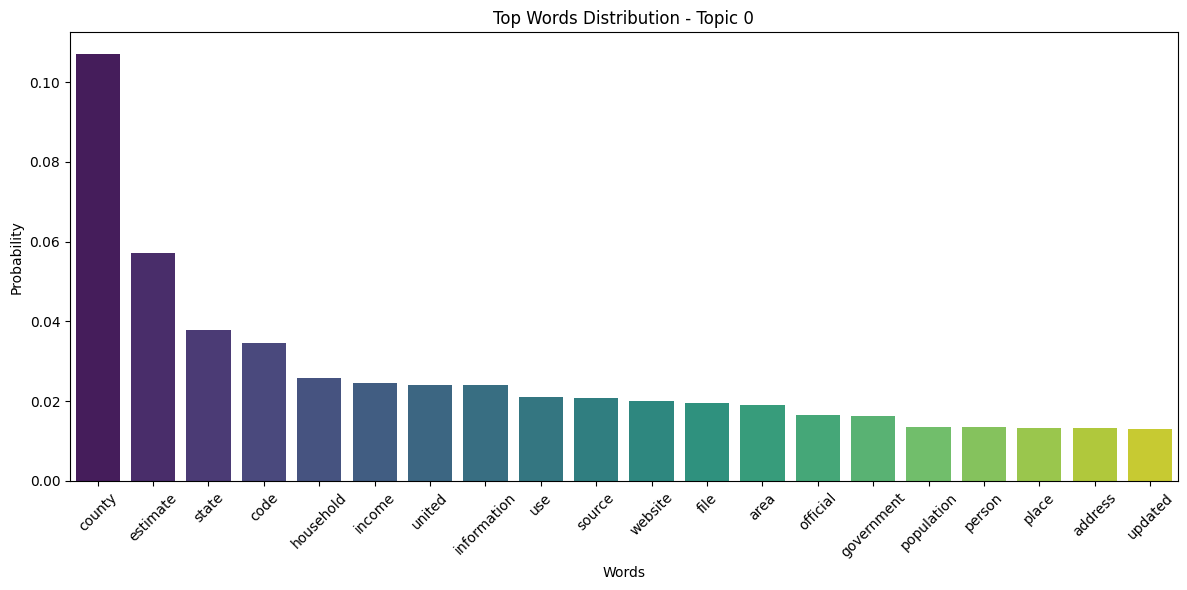

In [18]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_0, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 0')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

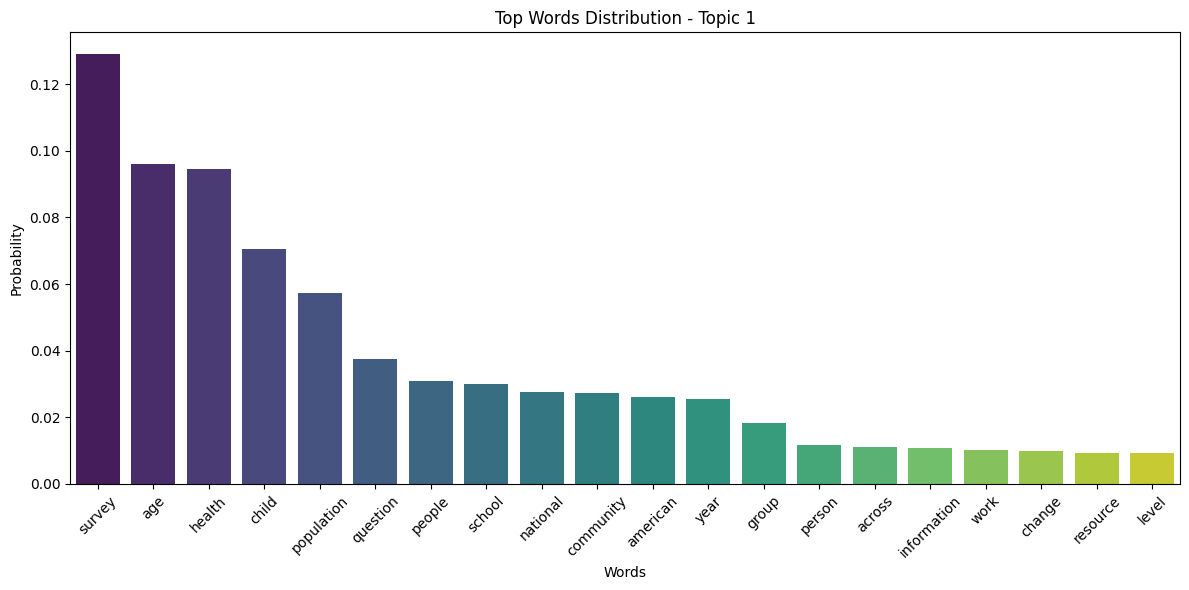

In [19]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_1, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 1')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

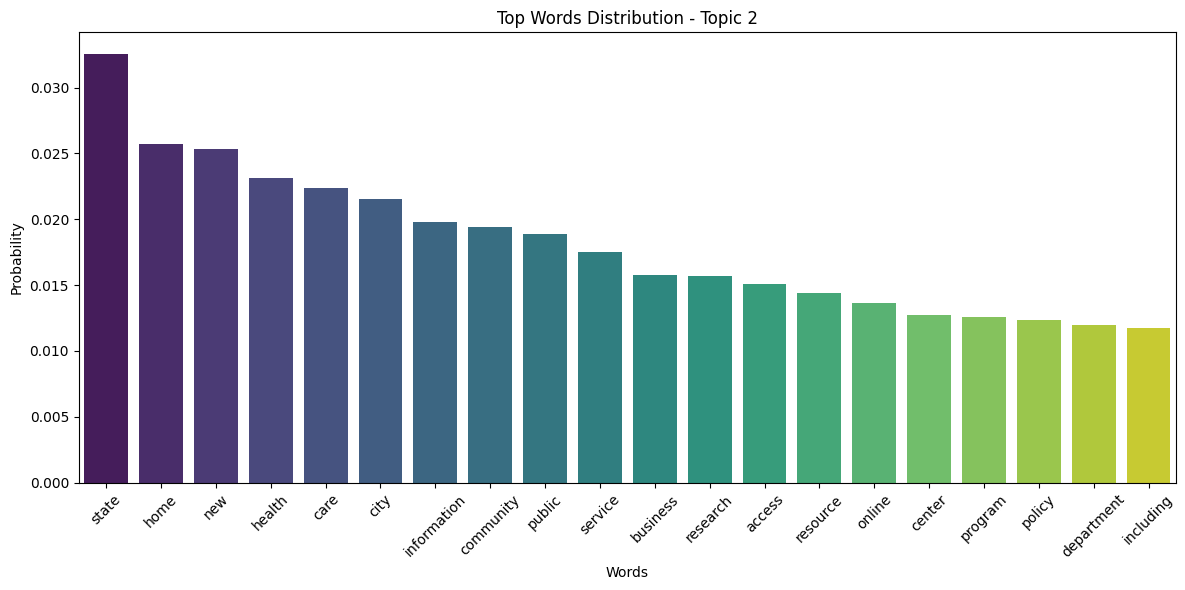

In [20]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_2, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 2')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

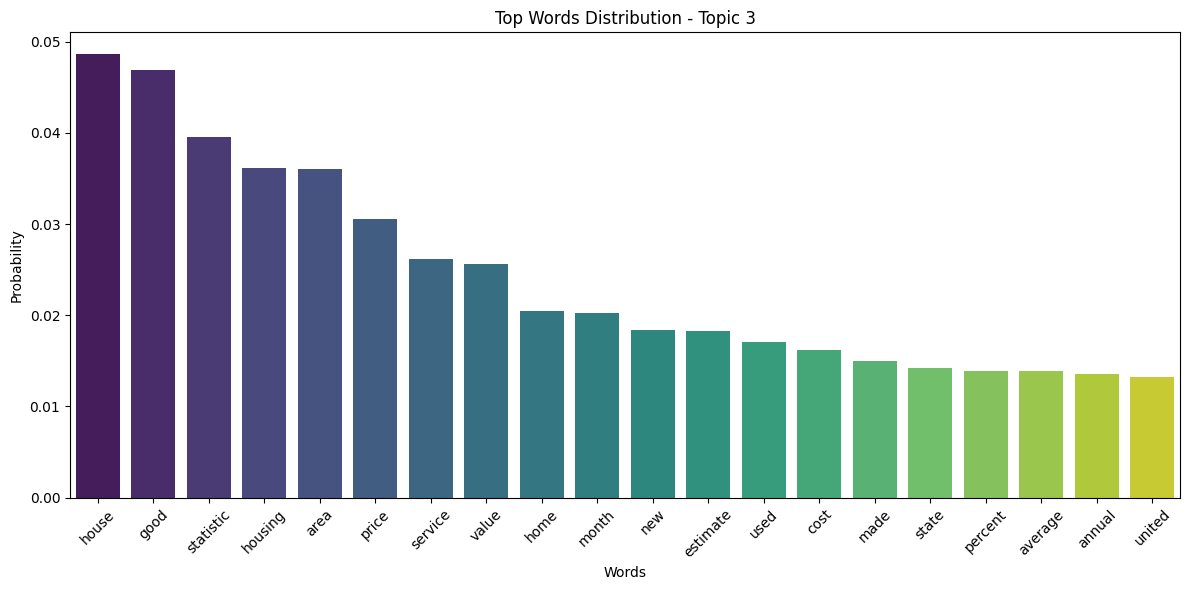

In [21]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_3, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 3')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

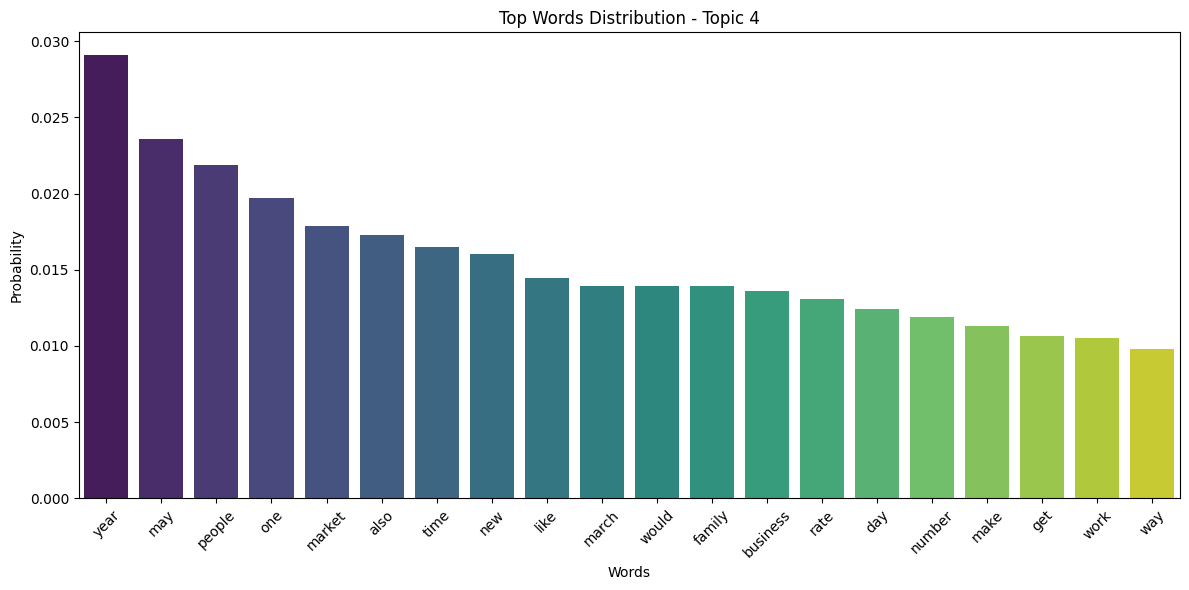

In [22]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot_4, x='Word', y='Probability', palette='viridis')

# Add title and labels
plt.title('Top Words Distribution - Topic 4')
plt.xlabel('Words')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#Probability of each document per topic
cols = ["Topic_" + str(each) for each in range(lda.n_components)]
docs = ["Document_" + str(each) for each in range(X.shape[0])]

df_topics = pd.DataFrame(np.round(doc_topics,2),
                         columns=cols,
                         index=docs)

df_topics

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
Document_0,0.00,0.00,0.00,0.09,0.91
Document_1,0.00,0.00,0.00,0.00,0.99
Document_2,0.33,0.01,0.29,0.02,0.35
Document_3,0.19,0.04,0.15,0.08,0.54
Document_4,0.40,0.09,0.36,0.01,0.14
...,...,...,...,...,...
Document_324,0.00,0.00,0.00,0.02,0.97
Document_325,0.03,0.00,0.36,0.15,0.45
Document_326,0.00,0.02,0.49,0.00,0.48
Document_327,0.21,0.01,0.78,0.01,0.01


In [24]:
#Assigning each document the topic with the highest probability
imp_topic = np.argmax(df_topics.values, axis=1)
df_topics["top_topic"] = imp_topic
print(df_topics.head(10))

            Topic_0  Topic_1  Topic_2  Topic_3  Topic_4  top_topic
Document_0     0.00     0.00     0.00     0.09     0.91          4
Document_1     0.00     0.00     0.00     0.00     0.99          4
Document_2     0.33     0.01     0.29     0.02     0.35          4
Document_3     0.19     0.04     0.15     0.08     0.54          4
Document_4     0.40     0.09     0.36     0.01     0.14          0
Document_5     0.08     0.05     0.14     0.40     0.34          3
Document_6     0.00     0.00     0.98     0.00     0.00          2
Document_7     0.47     0.01     0.51     0.01     0.01          2
Document_8     0.03     0.00     0.00     0.00     0.97          4
Document_9     0.19     0.00     0.73     0.04     0.03          2


In [25]:
#Adding topics into original DF
conditions = [df_topics["top_topic"] == 0, df_topics["top_topic"] == 1, df_topics["top_topic"] == 2, 
              df_topics["top_topic"] == 3, df_topics["top_topic"] == 4]

choices = ["Comprehensive County Data: Population, Income, and Government Resources", 
           "National Health and Demographic Survey: Insights Across Communities", 
           "State and Community Health Services: Access and Resources", 
           "Housing Market Analysis: Prices, Values, and Statistics",
           "Annual Market Trends: Business, Family, and Economic Insights"]
final_data.loc[:,"Topic_Name"] = np.select(conditions, choices, default="Other")

final_data

,url,Found Links,Source,content,Topic_Name
0,http://bonddad.blogspot.com/2021/12/manufactur...,[http://www.census.gov/econ/www/],cited,the bonddad blog manufacturing still red hot c...,"Annual Market Trends: Business, Family, and Ec..."
1,http://bonddad.blogspot.com/2023/09/initial-jo...,[http://www.census.gov/econ/www/],cited,the bonddad blog initial jobless claim remain ...,"Annual Market Trends: Business, Family, and Ec..."
2,http://bostongis.org/?content_name=umn_datasou...,[http://www.census.gov/geo/www/tiger/index.htm...,cited,ogr odbcboston geographic information systemsh...,"Annual Market Trends: Business, Family, and Ec..."
3,http://colonialsense.com/society-lifestyle/cen...,[mailto:?subject=colonial sense: society-lifes...,cited,colonial sense societylifestyle census governa...,"Annual Market Trends: Business, Family, and Ec..."
4,http://fileformats.archiveteam.org/index.php?t...,[https://www.census.gov/programs-surveys/cps.h...,cited,cps project just solve the file format problem...,"Comprehensive County Data: Population, Income,..."
...,...,...,...,...,...
324,https://www.withdra.com/p/mind-the-gap-explori...,[https://www.census.gov/library/publications/2...,cited,vibecession exploring the growing divide betwe...,"Annual Market Trends: Business, Family, and Ec..."
325,https://www.wxpr.org/2022-07-28/these-hurrican...,[https://data.census.gov/],repackaged,these hurricane flood map reveal the climate f...,"Annual Market Trends: Business, Family, and Ec..."
326,https://www.wyomingpublicmedia.org/news/2021-0...,[https://www.census.gov/data/experimental-data...,repackaged,single mother bore brunt of coronavirus anxiet...,State and Community Health Services: Access an...
327,https://yelmwa.gov/i_want_to/contact/send_a_no...,[https://2020census.gov/en],cited,welcome to yelm washingtonskip to contentsearc...,State and Community Health Services: Access an...


In [26]:
# Simple count of topics
final_data['Topic_Name'].value_counts()

Topic_Name
State and Community Health Services: Access and Resources                  124
Annual Market Trends: Business, Family, and Economic Insights              115
Comprehensive County Data: Population, Income, and Government Resources     69
Housing Market Analysis: Prices, Values, and Statistics                     11
National Health and Demographic Survey: Insights Across Communities         10
Name: count, dtype: int64

In [ ]:
# split data into repackaged and cited instances
final_data_repackaged = final_data[final_data['Source']=='repackaged']
final_data_cited = final_data[final_data['Source']=='cited']


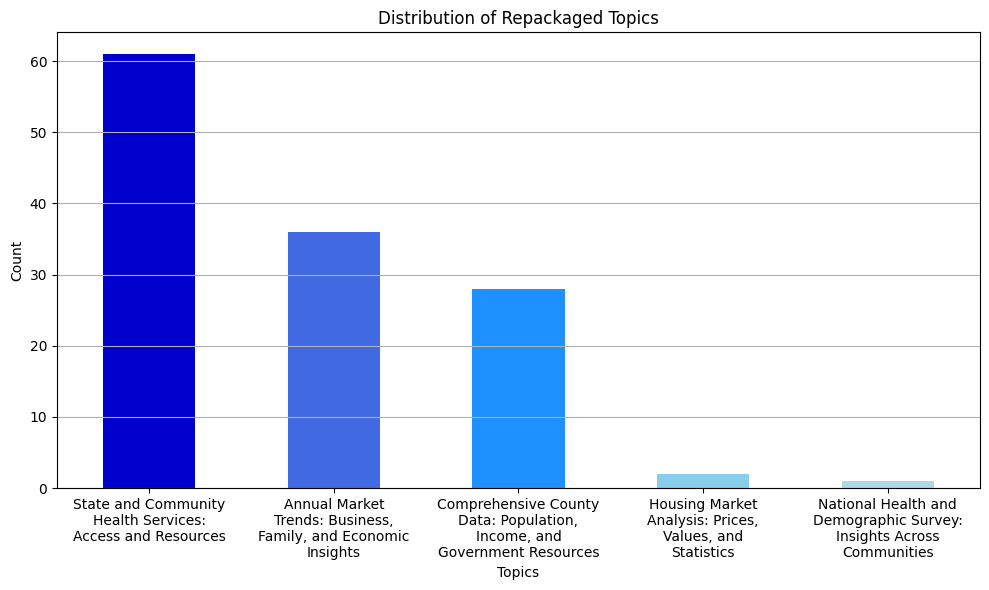

In [28]:
import textwrap # wrap labels

# Get the value counts
topic_counts = final_data_repackaged['Topic_Name'].value_counts()

# Define a list of blue shades
blue_shades = ['#0000CD', '#4169E1', '#1E90FF', '#87CEEB', '#ADD8E6']

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in topic_counts.index]

# Create a bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color=blue_shades[:len(topic_counts)])
plt.title('Distribution of Repackaged Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

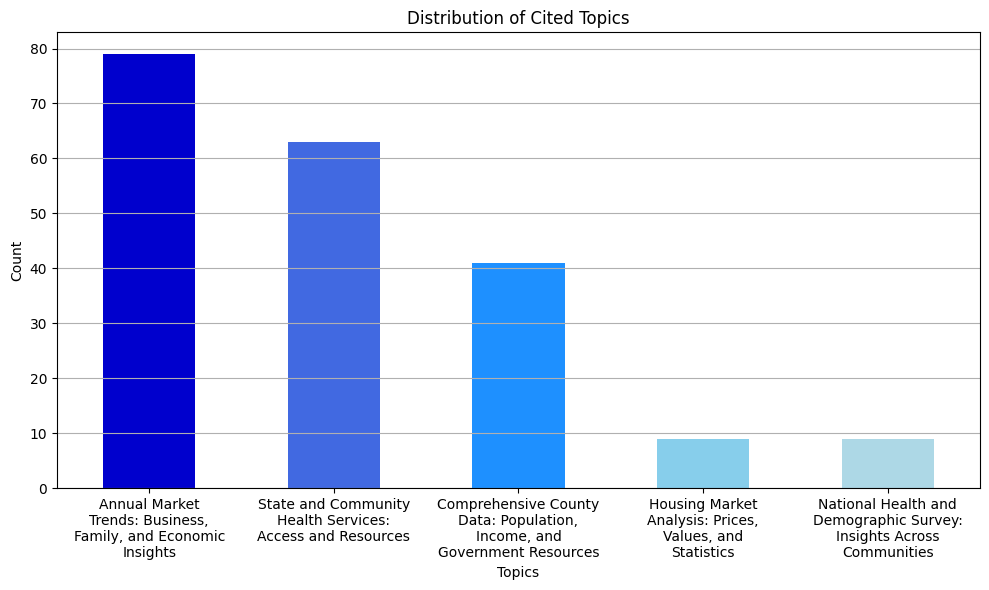

In [29]:
# Get the value counts
topic_counts = final_data_cited['Topic_Name'].value_counts()

# Define a list of blue shades
blue_shades = ['#0000CD', '#4169E1', '#1E90FF', '#87CEEB', '#ADD8E6']

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in topic_counts.index]

# Create a bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color=blue_shades[:len(topic_counts)])
plt.title('Distribution of Cited Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

## Mapping

### Repackaged

In [30]:
# mapping packages
from geopy.geocoders import Nominatim
from tqdm import tqdm
import re
import socket
import time
from ip2geotools.databases.noncommercial import DbIpCity
import idna

# Function to get the details of the IP address including city, country, coordinates, etc.
def get_details(ip):
    res = DbIpCity.get(ip, api_key="free")
    return {
        "IP Address": res.ip_address,
        "City": res.city,
        "Region": res.region,
        "Country": res.country,
        "latitude": res.latitude, # we will get errors for latitude and longitude; this is resolved in the next step
        "longitude": res.longitude
    }

# Function to process a list of URLs and save the results into a DataFrame
def process_urls(urls):
    data = []
    for url in urls:
        try:
            domain = url.split('//')[-1].split('/')[0]
            ip_add = socket.gethostbyname(domain)
            details = get_details(ip_add)
            details["URL"] = url
            data.append(details)
            time.sleep(1)  # Add delay to prevent rate limiting
        except socket.gaierror:
            print(f"Could not resolve {url}: DNS resolution failed")
        except idna.core.IDNAError as e:
            print(f"Could not process {url}: {e}")
        except Exception as e:
            print(f"Could not process {url}: {e}")

    df = pd.DataFrame(data)
    return df

# List of URLs to process
urls_repackaged = final_data_repackaged['url']
urls_repackaged = list(set(urls_repackaged)) # remove duplicate urls

# Process each URL and save the results into a DataFrame
map_df_repackaged = process_urls(urls_repackaged)
print(map_df_repackaged)

Could not resolve https://hcup-us.ahrq.gov:443/reports/statbriefs/sb138.jsp: DNS resolution failed


KeyboardInterrupt: 

In [ ]:
map_df_repackaged['City'] = map_df_repackaged['City'].apply(lambda x: re.sub(r'\(.*?\)', '', x).strip()) # removing data in parenthesis for city so we can get lat and long

# Initialize the geolocator
geolocator = Nominatim(user_agent="capstone_data_pull2")

# Function to get latitude and longitude
def get_lat_long(city, region, country):
    location = geolocator.geocode(f"{city}, {region}, {country}", timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

for index, row in tqdm(map_df_repackaged.iterrows(), total=map_df_repackaged.shape[0]):
    latitude, longitude = get_lat_long(row['City'], row['Region'], row['Country'])
    map_df_repackaged.at[index, 'latitude'] = latitude
    map_df_repackaged.at[index, 'longitude'] = longitude

In [ ]:
# Renaming the column
map_df_repackaged.rename(columns={'URL': 'url'}, inplace=True)

# Merge the DataFrames on the 'URL' column
map_df_repackaged_merged = pd.merge(map_df_repackaged, final_data_repackaged, on='url', how='inner')
map_df_repackaged_merged

In [ ]:
#Mapping data
import plotly.graph_objects as go

# Define a color map for the topics
color_map = {
    'Comprehensive County Data: Population, Income, and Government Resources': 'blue',
    'National Health and Demographic Survey: Insights Across Communities': 'purple',
    'State and Community Health Services: Access and Resources': 'red',
    'Housing Market Analysis: Prices, Values, and Statistics': 'pink',
    'Annual Market Trends: Business, Family, and Economic Insights': 'lightgreen',
    'Other': 'gray'
}

# Map the Topic_Name to colors
map_df_repackaged_merged['color'] = map_df_repackaged_merged['Topic_Name'].map(color_map)

# Create the scatter geo plot
fig = go.Figure(data=go.Scattergeo(
    lon=map_df_repackaged_merged['longitude'],
    lat=map_df_repackaged_merged['latitude'],
    mode='markers',
    text=map_df_repackaged_merged['url'],
    hoverinfo='text',
    marker=dict(color=map_df_repackaged_merged['color'], size=10, line=dict(width=1, color='black')),
    showlegend=False
))

# Update the layout to include a legend
fig.update_layout(
    title='Instances of Repackaged Census Data',
    geo_scope='north america',
    legend_title_text='Topics',
    legend=dict(
        itemsizing='constant'
    )
)

# Add legend items manually
for topic, color in color_map.items():
    fig.add_trace(go.Scattergeo(
        lon=[None], lat=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        name=topic
    ))

# Show the plot
fig.show()

### Cited

In [ ]:
# Function to get the details of the IP address including city, country, coordinates, etc.
def get_details(ip):
    res = DbIpCity.get(ip, api_key="free")
    return {
        "IP Address": res.ip_address,
        "City": res.city,
        "Region": res.region,
        "Country": res.country,
        "latitude": res.latitude, # we will get errors for latitude and longitude; this is resolved in the next step
        "longitude": res.longitude
    }

# Function to process a list of URLs and save the results into a DataFrame
def process_urls(urls):
    data = []
    for url in urls:
        try:
            domain = url.split('//')[-1].split('/')[0]
            ip_add = socket.gethostbyname(domain)
            details = get_details(ip_add)
            details["URL"] = url
            data.append(details)
            time.sleep(1)  # Add delay to prevent rate limiting
        except socket.gaierror:
            print(f"Could not resolve {url}: DNS resolution failed")
        except idna.core.IDNAError as e:
            print(f"Could not process {url}: {e}")
        except Exception as e:
            print(f"Could not process {url}: {e}")

    df = pd.DataFrame(data)
    return df

# List of URLs to process
urls_cited = final_data_cited['url']
urls_cited = list(set(urls_cited)) # remove duplicate urls

# Process each URL and save the results into a DataFrame
map_df_cited = process_urls(urls_cited)
print(map_df_cited)

In [172]:
# resolve lat/long errors

map_df_cited['City'] = map_df_cited['City'].apply(lambda x: re.sub(r'\(.*?\)', '', x).strip()) # removing data in parenthesis for city so we can get lat and long

# Initialize the geolocator
geolocator = Nominatim(user_agent="capstone_data_pull3")

# Function to get latitude and longitude
def get_lat_long(city, region, country):
    location = geolocator.geocode(f"{city}, {region}, {country}", timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

for index, row in tqdm(map_df_cited.iterrows(), total=map_df_cited.shape[0]):
    latitude, longitude = get_lat_long(row['City'], row['Region'], row['Country'])
    map_df_cited.at[index, 'latitude'] = latitude
    map_df_cited.at[index, 'longitude'] = longitude

100%|██████████| 201/201 [02:33<00:00,  1.31it/s]


In [ ]:
# Renaming the column
map_df_cited.rename(columns={'URL': 'url'}, inplace=True)

# Merge the DataFrames on the 'URL' column
map_df_cited_merged = pd.merge(map_df_cited, final_data_cited, on='url', how='inner')
map_df_cited_merged

In [148]:
# Define a color map for the topics
color_map = {
    'Comprehensive County Data: Population, Income, and Government Resources': 'blue',
    'National Health and Demographic Survey: Insights Across Communities': 'purple',
    'State and Community Health Services: Access and Resources': 'red',
    'Housing Market Analysis: Prices, Values, and Statistics': 'pink',
    'Annual Market Trends: Business, Family, and Economic Insights': 'lightgreen',
    'Other': 'gray'
}

# Map the Topic_Name to colors
map_df_cited_merged['color'] = map_df_cited_merged['Topic_Name'].map(color_map)

# Create the scatter geo plot
fig = go.Figure(data=go.Scattergeo(
    lon=map_df_cited_merged['longitude'],
    lat=map_df_cited_merged['latitude'],
    mode='markers',
    text=map_df_cited_merged['url'],
    hoverinfo='text',
    marker=dict(color=map_df_cited_merged['color'], size=10, line=dict(width=1, color='black')),
    showlegend=False
))

# Update the layout to include a legend
fig.update_layout(
    title='Instances of Cited Census Data',
    geo_scope='north america',
    legend_title_text='Topics',
    legend=dict(
        itemsizing='constant'
    )
)

# Add legend items manually
for topic, color in color_map.items():
    fig.add_trace(go.Scattergeo(
        lon=[None], lat=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        name=topic
    ))

# Show the plot
fig.show()

## Seed Link Analysis

In [42]:
r_url = final_data_repackaged['url'].tolist()
c_url = final_data_cited['url'].tolist()

Repackaged

In [44]:
# Parsing links and creating a dataframe
from urllib.parse import urlparse # parse out urls

seed_parsed_url = []

for url in r_url:
    seed_parsed = urlparse(url)
    seed_parsed_url.append({
        "URL": url,
        "Scheme": seed_parsed.scheme,
        "Netloc": seed_parsed.netloc,
        "Path": seed_parsed.path,
        "Query": seed_parsed.query
    })

# Convert the list of dictionaries to a DataFrame
r_seed_parsed_links = pd.DataFrame(seed_parsed_url)

In [45]:
# Filter out any row in paths that has NA or only a / in it 
r_seed_parsed_links = r_seed_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
r_seed_parsed_links = r_seed_parsed_links[r_seed_parsed_links['Path'] != '/']

print(r_seed_parsed_links)

                                                   URL Scheme  \
0    http://li558-193.members.linode.com/index.php?...   http   
1    http://www.tuscco.com/event/tuscaloosa-county-...   http   
2    https://929thebull.com/spill-the-beans-rumors-...  https   
3    https://97x.com/kansas-officials-catch-someone...  https   
4    https://alfred.stlouisfed.org/series?seid=puaa...  https   
..                                                 ...    ...   
123            https://www.wakeforestnc.gov/file/10549  https   
124                https://www.wikidata.org/wiki/q1546  https   
125              https://www.wikidata.org/wiki/q578055  https   
126  https://www.wxpr.org/2022-07-28/these-hurrican...  https   
127  https://www.wyomingpublicmedia.org/news/2021-0...  https   

                           Netloc  \
0    li558-193.members.linode.com   
1                  www.tuscco.com   
2                  929thebull.com   
3                         97x.com   
4           alfred.stlouisfed.org 

In [46]:
netloc_distribution = r_seed_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
catalog.data.gov                   7
hopewelltwp.com                    5
cuyahogacounty.gov                 4
www.incomebyzipcode.com            4
memberportal.keywestchamber.org    3
                                  ..
libguides.luc.edu                  1
libguides.csun.edu                 1
libguides.columbiasouthern.edu     1
kingfm.com                         1
www.wyomingpublicmedia.org         1
Name: count, Length: 106, dtype: int64


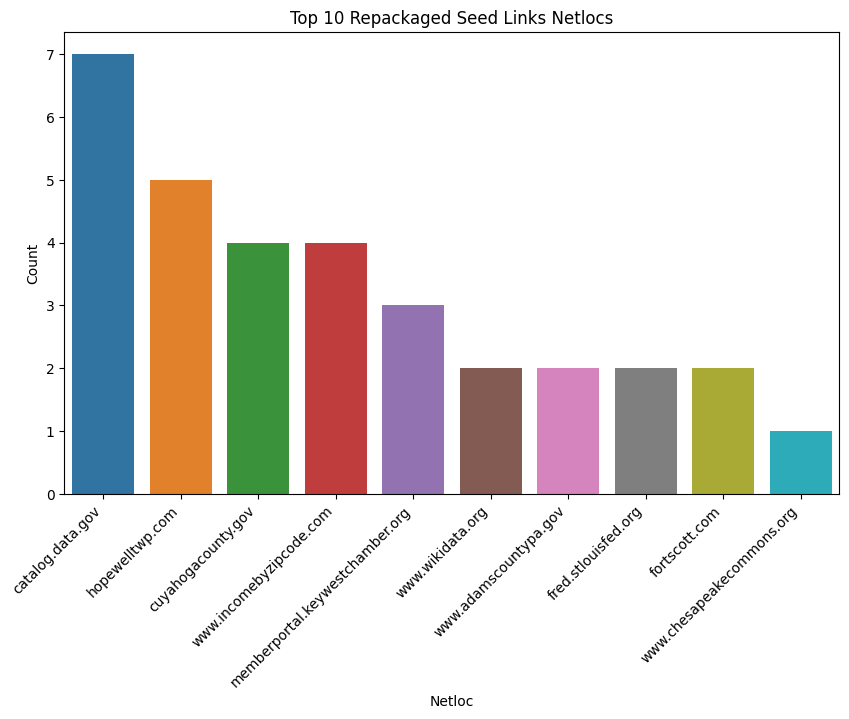

In [49]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = r_seed_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Repackaged Seed Links Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

Cited

In [50]:
# Parsing links and creating a dataframe
from urllib.parse import urlparse # parse out urls

c_seed_parsed_url = []

for url in c_url:
    c_seed_parsed = urlparse(url)
    c_seed_parsed_url.append({
        "URL": url,
        "Scheme": c_seed_parsed.scheme,
        "Netloc": c_seed_parsed.netloc,
        "Path": c_seed_parsed.path,
        "Query": c_seed_parsed.query
    })

# Convert the list of dictionaries to a DataFrame
c_seed_parsed_links = pd.DataFrame(c_seed_parsed_url)

In [51]:
# Filter out any row in paths that has NA or only a / in it 
c_seed_parsed_links = c_seed_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
c_seed_parsed_links = c_seed_parsed_links[c_seed_parsed_links['Path'] != '/']

print(c_seed_parsed_links)

                                                   URL Scheme  \
0    http://bonddad.blogspot.com/2021/12/manufactur...   http   
1    http://bonddad.blogspot.com/2023/09/initial-jo...   http   
3    http://colonialsense.com/society-lifestyle/cen...   http   
4    http://fileformats.archiveteam.org/index.php?t...   http   
6    http://labor.state.vt.us/employer.cfm?stfips=5...   http   
..                                                 ...    ...   
196  https://www.wgbh.org/news/national/2019-10-14/...  https   
197  https://www.wikiwand.com/en/2011_united_kingdo...  https   
198  https://www.withdra.com/p/mind-the-gap-explori...  https   
199  https://yelmwa.gov/i_want_to/contact/send_a_no...  https   
200        https://yelmwa.gov/news_detail_t10_r448.php  https   

                          Netloc  \
0           bonddad.blogspot.com   
1           bonddad.blogspot.com   
3              colonialsense.com   
4    fileformats.archiveteam.org   
6              labor.state.vt.us   
.. 

In [52]:
netloc_distribution = c_seed_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

Netloc distribution:
Netloc
alfred.stlouisfed.org      11
fred.stlouisfed.org        11
statisticalatlas.com       10
reddragonleo.com            4
bonddad.blogspot.com        3
                           ..
horasis.org                 1
hardingnj.org               1
guides.wpunj.edu            1
grocerants.blogspot.com     1
otisandjames.com            1
Name: count, Length: 139, dtype: int64


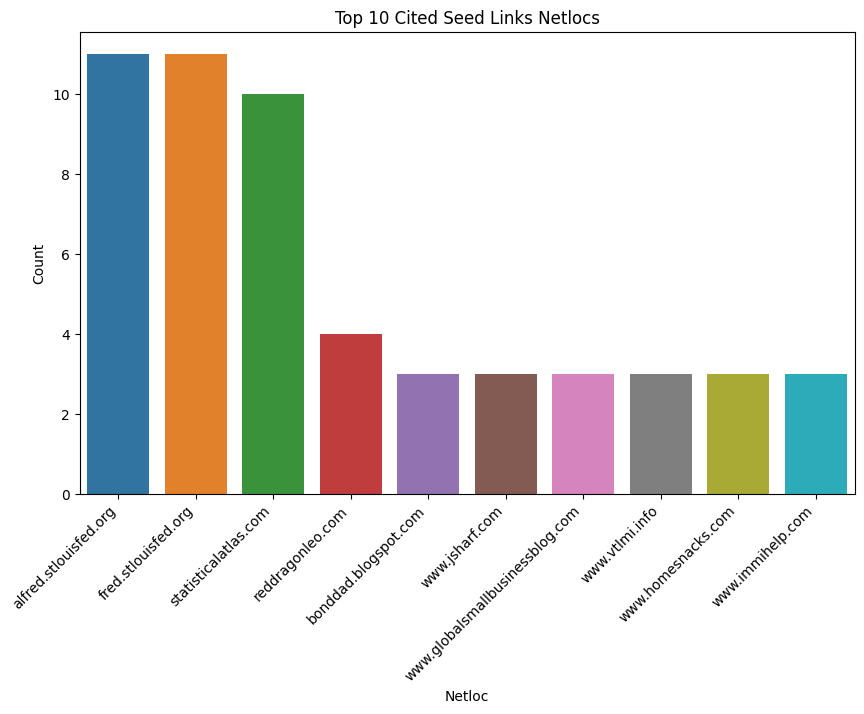

In [53]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = c_seed_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Cited Seed Links Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

## USCB Link Parsing

In [36]:
from urllib.parse import urlparse # parse out urls

#Saving Found Links into a list for later analysis
urls = foundlinks['Found Links'].tolist()

# Filter out URLs that are just 'census.gov' or 'census.gov/'
filtered_urls = [
    url for url in urls 
    if not (urlparse(url).netloc == 'www.census.gov' and (urlparse(url).path == '' or urlparse(url).path == '/'))
]

len(filtered_urls)

702

In [37]:
#Identify patterns for repackaged links
data_tables_patterns = ['table', 'dataset', 'data', 'productview']
repackaged_data_tables_urls = [url for url in filtered_urls if any(pattern in url for pattern in data_tables_patterns)]
cited_data_tables_urls = [url for url in filtered_urls if not any(pattern in url for pattern in data_tables_patterns)]

In [38]:
#Grabbing number of links
len(repackaged_data_tables_urls)

189

In [39]:
#Grabbing number of links
len(cited_data_tables_urls)

513

### Repackaged

In [40]:
# Parsing links and creating a dataframe

r_parsed = []

for url in repackaged_data_tables_urls:
    parsed_url = urlparse(url)
    r_parsed.append({
        "URL": url,
        "Scheme": parsed_url.scheme,
        "Netloc": parsed_url.netloc,
        "Path": parsed_url.path,
        "Query": parsed_url.query
    })

# Convert the list of dictionaries to a DataFrame
r_parsed_links = pd.DataFrame(r_parsed)

In [ ]:
# Filter out any row in paths that has NA or only a / in it 
r_parsed_links = r_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
r_parsed_links = r_parsed_links[r_parsed_links['Path'] != '/']

print(r_parsed_links)

In [ ]:
# Count the number of URLs
url_count = r_parsed_links['URL'].count()
print(f"Total number of URLs: {url_count}")

# Count the number of unique schemes
unique_schemes = r_parsed_links['Scheme'].nunique()
print(f"Number of unique schemes: {unique_schemes}")

# Count the number of unique netlocs
unique_netlocs = r_parsed_links['Netloc'].nunique()
print(f"Number of unique netlocs: {unique_netlocs}")

# Count the number of unique Paths
unique_paths = r_parsed_links['Path'].nunique()
print(f"Number of unique Paths: {unique_paths}")

In [ ]:
# Extracting additional insights
from collections import Counter

# 1. Identify the most common URL paths
r_paths = r_parsed_links['Path']
r_path_counts = Counter(r_paths)
r_most_common_paths = r_path_counts.most_common(15)

print("\nMost common Repackaged URL paths:")
for path, count in r_most_common_paths:
    print(f"{path}: {count}")

In [ ]:
tables, counts = zip(*r_most_common_paths)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Paths in Repackaged Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

In [ ]:
netloc_distribution = r_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

In [ ]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = r_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Repackaged Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
r_query = r_parsed_links.replace('', pd.NA).dropna(subset=['Query'])
print(r_query)

In [ ]:
# Extract and count unique query parameters
r_query['Query_Params'] = r_query['Query'].apply(lambda x: len(x.split('&')) if x else 0)
query_params_distribution = r_query['Query_Params'].value_counts()
print("Repackaged Query parameters distribution:")
print(query_params_distribution)

# Plot query parameters distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=r_query, x='Query_Params', order=r_query['Query_Params'].value_counts().index)
plt.title('Distribution of Repackaged Query Parameters Count')
plt.xlabel('Number of Query Parameters')
plt.ylabel('Count')
plt.show()

In [ ]:
# Extracting additional insights
from collections import Counter

# 1. Identify the most common URL paths
r_query = r_query['Query']
r_query_counts = Counter(r_query)
r_most_common_query = r_query_counts.most_common(15)

print("\nMost common Repackaged URL paths:")
for path, count in r_most_common_query:
    print(f"{path}: {count}")

In [ ]:
tables, counts = zip(*r_most_common_query)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Queries in Repackaged Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

### Cited

In [ ]:
#Parsing links and creating a dataframe

c_parsed = []

for url in cited_data_tables_urls:
    parsed_url = urlparse(url)
    c_parsed.append({
        "URL": url,
        "Scheme": parsed_url.scheme,
        "Netloc": parsed_url.netloc,
        "Path": parsed_url.path,
        "Query": parsed_url.query
    })

# Convert the list of dictionaries to a DataFrame
c_parsed_links = pd.DataFrame(c_parsed)

print(c_parsed_links)

In [ ]:
#Filter out any row in paths that has NA or only a / in it 
c_parsed_links = c_parsed_links.replace('', pd.NA).dropna(subset=['Path'])
c_parsed_links = c_parsed_links[c_parsed_links['Path'] != '/']

print(c_parsed_links)

In [ ]:
# Count the number of URLs
url_count = c_parsed_links['URL'].count()
print(f"Total number of URLs: {url_count}")

# Count the number of unique schemes
unique_schemes = c_parsed_links['Scheme'].nunique()
print(f"Number of unique schemes: {unique_schemes}")

# Count the number of unique netlocs
unique_netlocs = c_parsed_links['Netloc'].nunique()
print(f"Number of unique netlocs: {unique_netlocs}")

# Count the number of unique Paths
unique_paths = c_parsed_links['Path'].nunique()
print(f"Number of unique Paths: {unique_paths}")

In [ ]:
# 1. Identify the most common URL paths
c_paths = c_parsed_links['Path']
c_path_counts = Counter(c_paths)
c_most_common_paths = c_path_counts.most_common(15)

print("\nMost common Cited URL paths:")
for path, count in c_most_common_paths:
    print(f"{path}: {count}")

In [ ]:
tables, counts = zip(*c_most_common_paths)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced U.S. Census Paths in Cited Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()

In [ ]:
netloc_distribution = c_parsed_links['Netloc'].value_counts()
print("Netloc distribution:")
print(netloc_distribution)

In [ ]:
# Plot netloc distribution (top 10)
plt.figure(figsize=(10, 6))
top_netlocs = c_parsed_links['Netloc'].value_counts().nlargest(10)
sns.barplot(x=top_netlocs.index, y=top_netlocs.values)
plt.title('Top 10 Cited Netlocs')
plt.xlabel('Netloc')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
c_query = c_parsed_links.replace('', pd.NA).dropna(subset=['Query'])
print(c_query)

In [ ]:
# Extract and count unique query parameters
c_query['Query_Params'] = c_query['Query'].apply(lambda x: len(x.split('&')) if x else 0)
query_params_distribution = c_query['Query_Params'].value_counts()
print("Cited Query parameters distribution:")
print(query_params_distribution)

# Plot query parameters distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=c_query, x='Query_Params', order=c_query['Query_Params'].value_counts().index)
plt.title('Distribution of Cited Query Parameters Count')
plt.xlabel('Number of Query Parameters')
plt.ylabel('Count')
plt.show()

In [ ]:
# 1. Identify the most common URL Queries
c_query = c_query['Query']
c_query_counts = Counter(c_query)
c_most_common_query = c_query_counts.most_common(15)

print("\nMost common Cited URL Queries:")
for path, count in c_most_common_query:
    print(f"{path}: {count}")

In [ ]:
tables, counts = zip(*c_most_common_query)
# Create a DataFrame from the tables and counts
data = {'Census Table': tables, 'Number of References': counts}
df = pd.DataFrame(data)

# Create an interactive horizontal bar chart
fig = px.bar(df, 
             x='Number of References', 
             y='Census Table', 
             orientation='h',  # Horizontal bars
             title="Top 15 Most Referenced Queries in Cited Instances",
             labels={'Number of References': 'Number of References', 'Census Table': 'Census Table'},
             color='Number of References',  # Color bars based on count
             text='Number of References')  # Show count on hover

# Customize the hover data (you can modify this to include more details)
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Invert the y-axis to show the highest count at the top
fig.update_yaxes(categoryorder='total descending')

# Show the interactive plot
fig.show()